This notebook describes an example of the interpolation of altimetry data.<br>
The reading/writing of input files is done through specific classes defined in [pydiva2d](./pydiva2d.py).

In [54]:
import os
import logging
import shutil
import subprocess
import numpy as np
import importlib
import pydiva2d
from matplotlib import rcParams

In [29]:
importlib.reload(pydiva2d)

INFO:pydiva2d:Logs written in file
./logs/Diva_2017-03-30_15:56:41.log


<module 'pydiva2d' from '/home/ctroupin/Projects/SeaDataCloud/Python/pydiva2d.py'>

# Setup 

## Logging configuration

The *logging* is already configured in *pydiva2d*.<br>
Replace 'DEBUG' by 'INFO', 'WARNING' or 'ERROR'.

In [4]:
logger = logging.getLogger('divaAltimetry')
logger.setLevel(logging.DEBUG)

## Files and directories

Set the path to the Diva installation you want to work with.

In [42]:
divadir = "/home/ctroupin/Software/DIVA/DIVA-diva-4.7.1"

In [43]:
coastfile = "/home/ctroupin/IMEDEA/Diva/contours/coast.cont"
datafile = "/home/ctroupin/Projects/SeaDataCloud/Altimery/data/data_20140515_20140604.dat"
paramfile = "/home/ctroupin/IMEDEA/Diva/parameters/param.par"

## Matplotlib options

In [55]:
rcParams.update({'font.size': 16, 'figure.dpi': 300, 'savefig.bbox': 'tight'})
# rcParams.keys

## Directories

Create variables storing the Diva directories.

In [6]:
DivaDirs = pydiva2d.DivaDirectories(divadir)

INFO:pydiva2d:Diva main directory: /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1
INFO:pydiva2d:Creating Diva directory paths
INFO:pydiva2d:Binary directory:   /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/bin
INFO:pydiva2d:Source directory:   /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/src/Fortran
INFO:pydiva2d:Main 2D directory:  /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/divastripped
INFO:pydiva2d:Main 4D directory:  /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/JRA4/Climatology


Create variables storing the Diva input and output files.

In [7]:
DivaFiles = pydiva2d.Diva2Dfiles(DivaDirs.diva2d)

INFO:pydiva2d:Creating Diva 2D file names and paths
INFO:pydiva2d:Contour file:   /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/divastripped/input/coast.cont
INFO:pydiva2d:Parameter file: /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/divastripped/input/param.par
INFO:pydiva2d:Data file:      /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/divastripped/input/data.dat
INFO:pydiva2d:Valatxy file:   /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/divastripped/input/valatxy.coord
INFO:pydiva2d:Result file:    /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/divastripped/output/ghertonetcdf/results.nc
INFO:pydiva2d:Mesh file:      /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/divastripped/meshgenwork/fort.22
INFO:pydiva2d:Mesh topo file: /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/divastripped/meshgenwork/fort.23


# Prepare the input files

## Contour

We read it from an existing file created using the local topography.

In [17]:
contour2D = pydiva2d.Diva2DContours()
contour2D.read_from(coastfile)

INFO:pydiva2d:Creating Diva 2D contour object
INFO:pydiva2d:Reading contours from file /home/ctroupin/IMEDEA/Diva/contours/coast.cont
DEBUG:pydiva2d:Number of contours: 119


and write its content to the corresponding file defined in the **DivaFile** object:

In [18]:
contour2D.write_to(DivaFiles.contour)

INFO:pydiva2d:Number of contours: 119
INFO:pydiva2d:Number of contours: 119
DEBUG:pydiva2d:Sub-contour no. 1 has 8 points
DEBUG:pydiva2d:Sub-contour no. 2 has 4 points
DEBUG:pydiva2d:Sub-contour no. 3 has 4 points
DEBUG:pydiva2d:Sub-contour no. 4 has 2718 points
DEBUG:pydiva2d:Sub-contour no. 5 has 4 points
DEBUG:pydiva2d:Sub-contour no. 6 has 4 points
DEBUG:pydiva2d:Sub-contour no. 7 has 4 points
DEBUG:pydiva2d:Sub-contour no. 8 has 74 points
DEBUG:pydiva2d:Sub-contour no. 9 has 8 points
DEBUG:pydiva2d:Sub-contour no. 10 has 6 points
DEBUG:pydiva2d:Sub-contour no. 11 has 98 points
DEBUG:pydiva2d:Sub-contour no. 12 has 4 points
DEBUG:pydiva2d:Sub-contour no. 13 has 10 points
DEBUG:pydiva2d:Sub-contour no. 14 has 6 points
DEBUG:pydiva2d:Sub-contour no. 15 has 4 points
DEBUG:pydiva2d:Sub-contour no. 16 has 4 points
DEBUG:pydiva2d:Sub-contour no. 17 has 8 points
DEBUG:pydiva2d:Sub-contour no. 18 has 26 points
DEBUG:pydiva2d:Sub-contour no. 19 has 8 points
DEBUG:pydiva2d:Sub-contour no. 20

## Data

We also read it from an existing file:

In [44]:
data2D = pydiva2d.Diva2DData()
data2D.read_from(datafile)
data2D.count_data

INFO:pydiva2d:Creating Diva 2D data object
INFO:pydiva2d:Reading data from file /home/ctroupin/Projects/SeaDataCloud/Altimery/data/data_20140515_20140604.dat
INFO:pydiva2d:Number of data points: 11371


11371

and we write the values to the specified file:

In [45]:
data2D.write_to(DivaFiles.data)

INFO:pydiva2d:Written data into file /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/divastripped/input/data.dat


## Parameters

Read from existing `param.par` file:

In [33]:
parameters2D = pydiva2d.Diva2DParameters()
parameters2D.read_from(paramfile)
parameters2D.describe()

INFO:pydiva2d:Creating Diva 2D parameter object
INFO:pydiva2d:Reading parameters from file /home/ctroupin/IMEDEA/Diva/parameters/param.par


Correlation length: 2.0
icoordchange: 2
ispec: 0
ireg: 2
Domain: x-axis: from -5.5 to 37.0 with 426 steps of 0.1
Domain: y-axis: from 30.0 to 46.0 with 161 steps of 0.1
Exclusion value: -99.0
Signal-to-noise ratio: 0.5
Variance of the background field: 1.0


and we write them into a file:

In [34]:
parameters2D.write_to(DivaFiles.parameter)

INFO:pydiva2d:Written parameters into file /home/ctroupin/Software/DIVA/DIVA-diva-4.7.1/DIVA3D/divastripped/input/param.par


## List of extra points

In this example we don't require any additional points for the analysis.

# Run Diva

Now that the input files have been created we can perform a Diva analysis.

## Mesh generation

In [46]:
logger.info("Starting generation of the finite-element mesh")
subprocess.Popen("./divamesh", cwd=DivaDirs.diva2d, shell=True)
logger.info("Finished generation of the finite-element mesh")

INFO:divaAltimetry:Starting generation of the finite-element mesh
INFO:divaAltimetry:Finished generation of the finite-element mesh


## Run the diva calculation

In [47]:
logger.info("Starting computation of the gridded field")
subprocess.Popen("./divacalc", cwd=DivaDirs.diva2d, shell=True)
logger.info("Finished computation of the gridded field")

INFO:divaAltimetry:Starting computation of the gridded field
INFO:divaAltimetry:Finished computation of the gridded field


# Time for some plots

We import a few more modules to plot the input files content and the results.<br>
The last line asks for the plot to be done within the notebook, not as external window.

In [48]:
import netCDF4
import matplotlib.pyplot as plt
%matplotlib inline

## Input files

Let's represent the observations, the grid and the contours.<br>
By default, each contour is represented in a different color.

DEBUG:pydiva2d:No projection defined
DEBUG:pydiva2d:Adding contours to plot
DEBUG:pydiva2d:No projection defined
DEBUG:pydiva2d:Adding data points to plot
DEBUG:pydiva2d:Adding output grid to plot


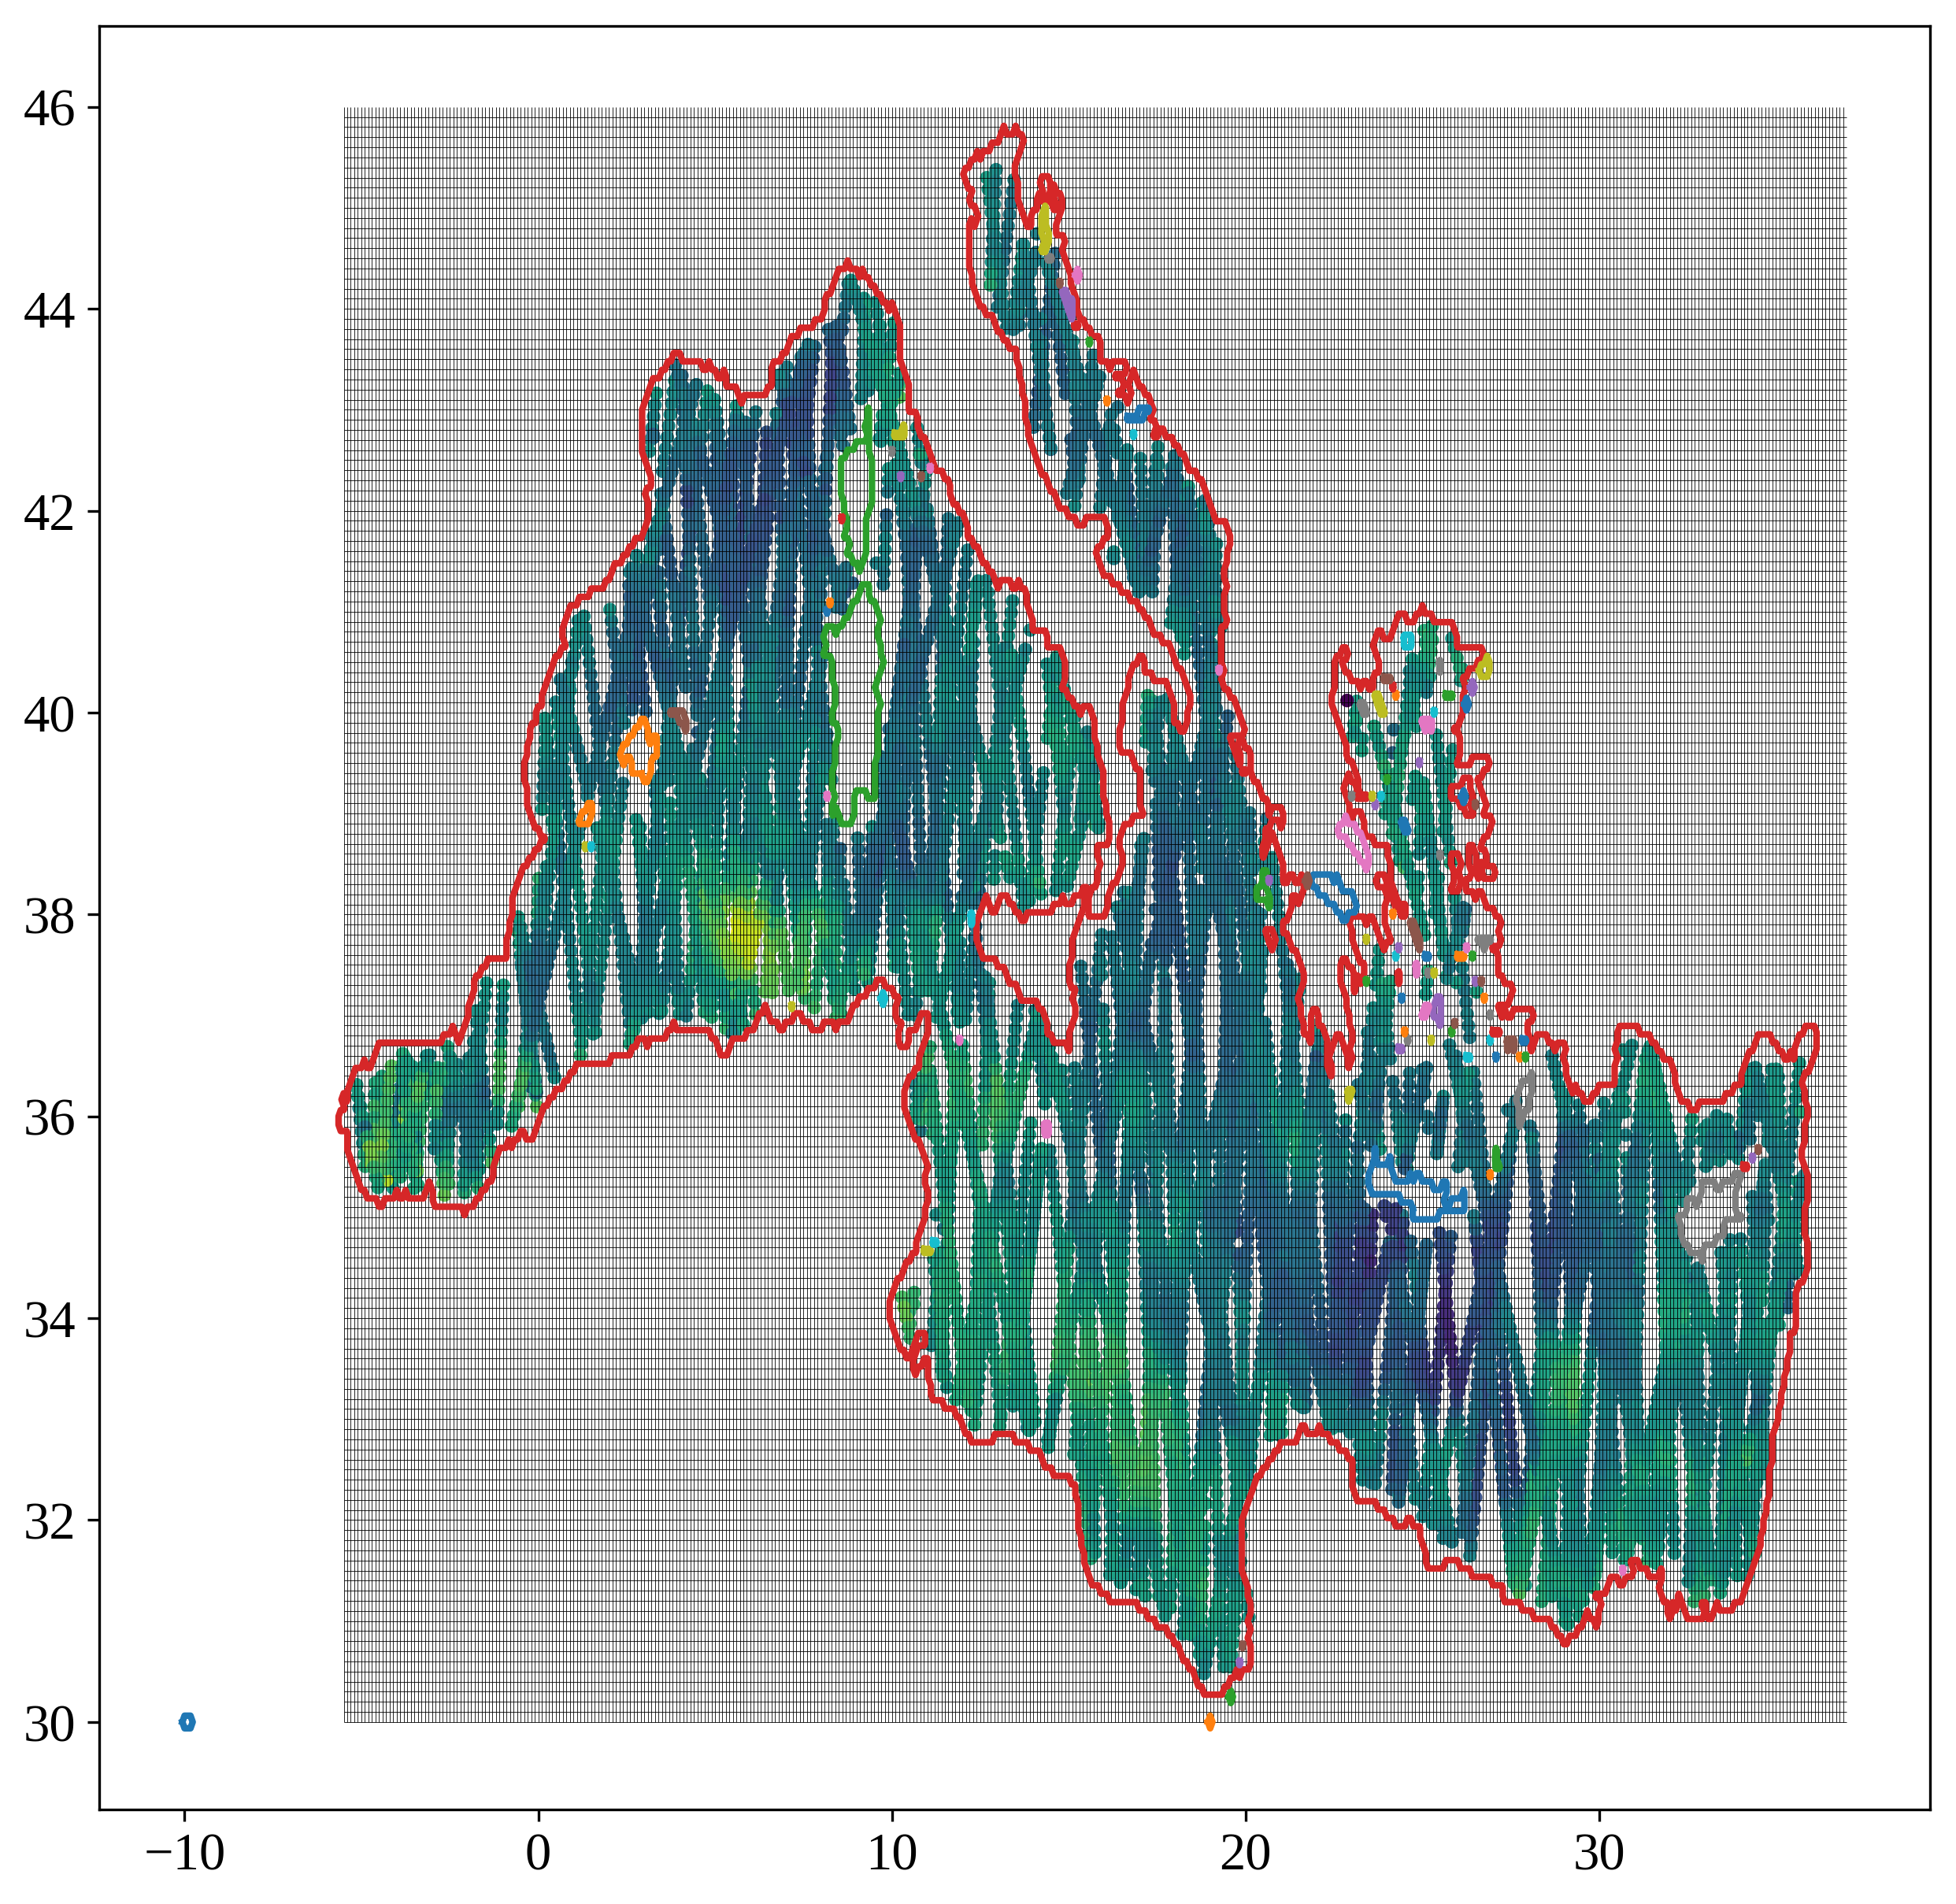

In [56]:
fig = plt.figure(figsize=(10, 10))
contour2D.add_to_plot(linewidth=2)
data2D.add_to_plot(s=10)
parameters2D.plot_outputgrid()

## Results 

DEBUG:pydiva2d:No projection defined
DEBUG:pydiva2d:Adding analysed field to plot


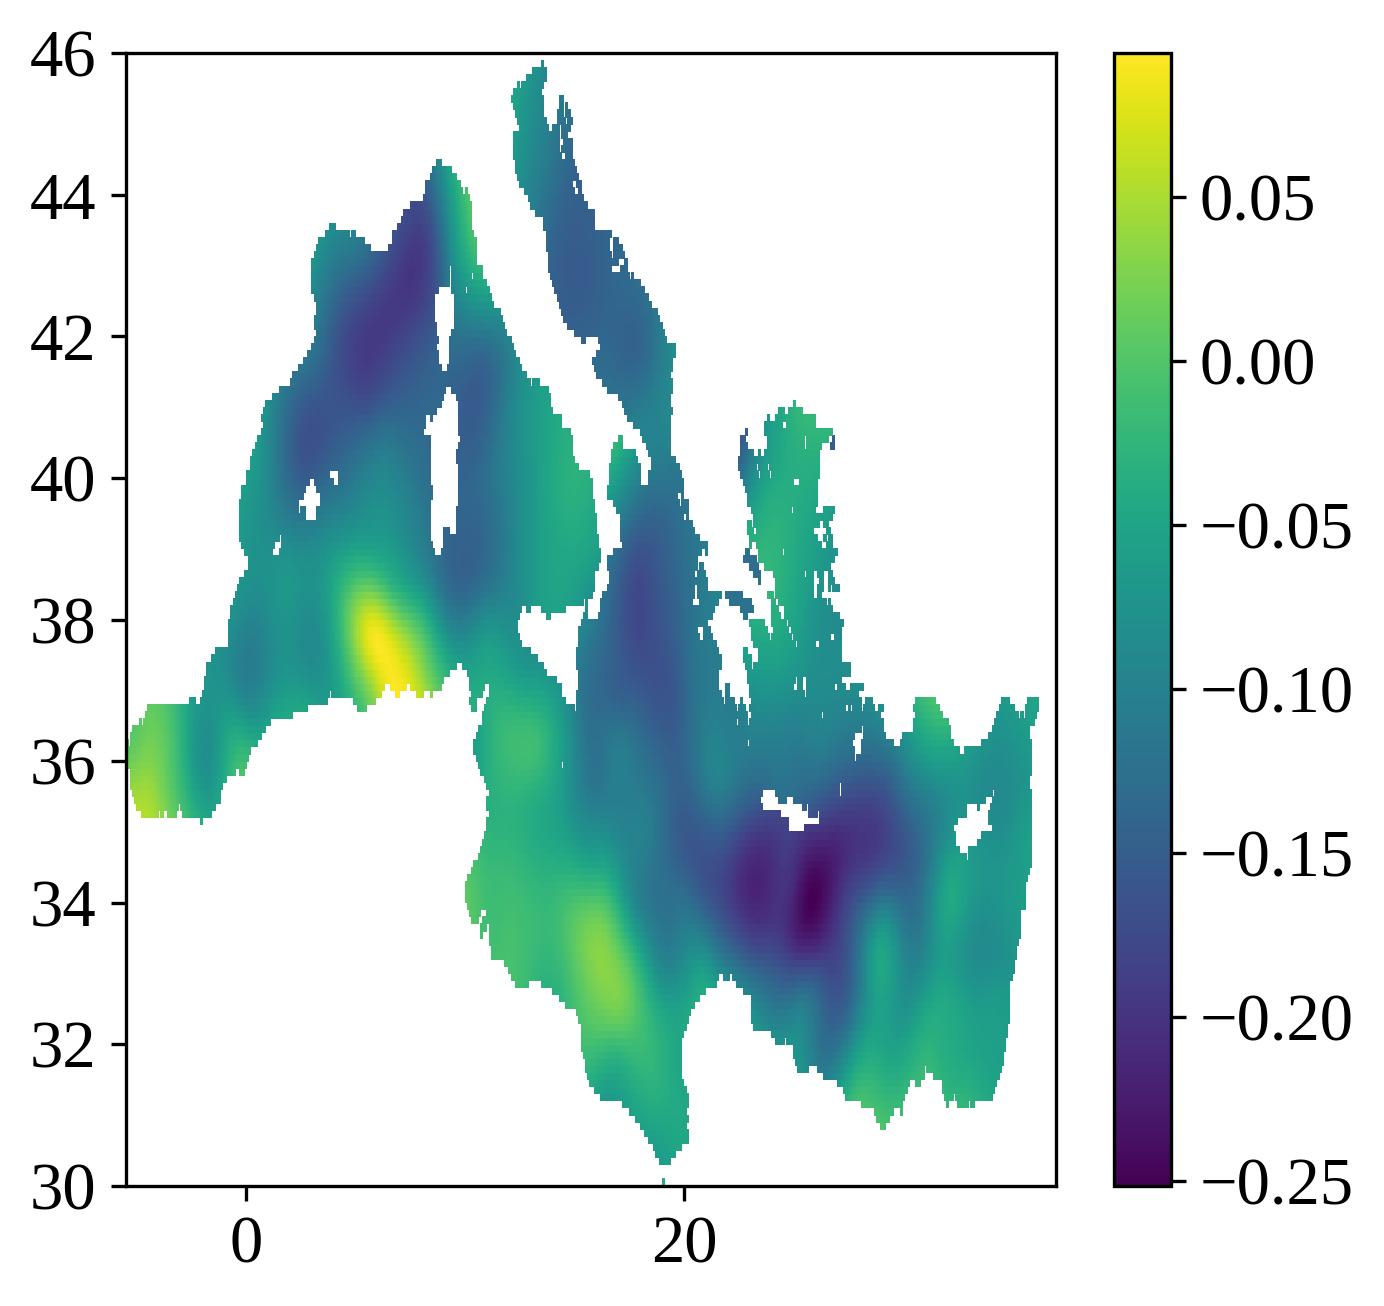

In [60]:
fig = plt.figure(figsize=(5, 5))
results2D = pydiva2d.Diva2DResults(DivaFiles.result)
results2D.add_to_plot('result')
#data2D.add_to_plot(cmap=plt.cm.viridis, s=.2)

The error field is represented using a similar command:

DEBUG:pydiva2d:No projection defined
DEBUG:pydiva2d:Adding analysed field to plot
DEBUG:pydiva2d:Adding data positions to plot


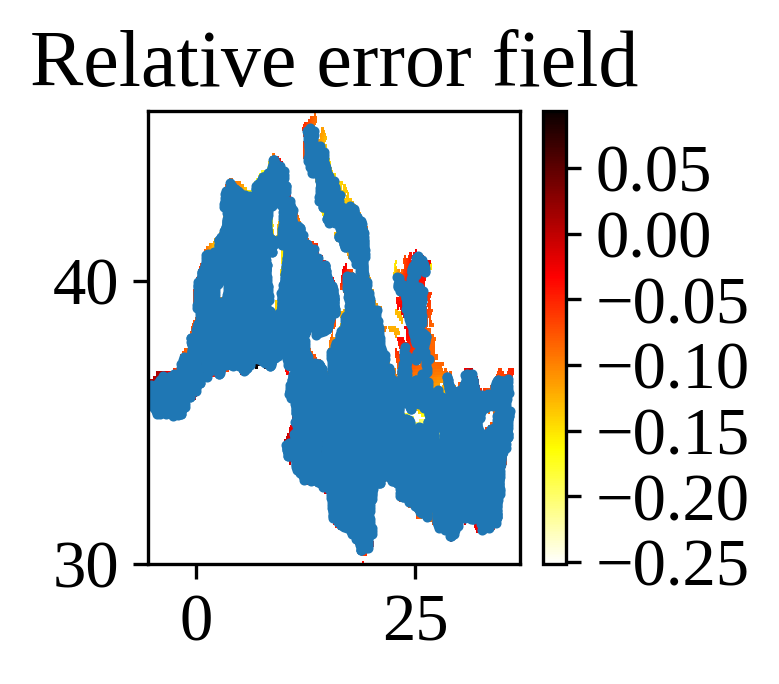

In [61]:
fig = plt.figure(figsize=(2, 2))
results2D.add_to_plot('error', cmap=plt.cm.hot_r)
data2D.add_positions_to_plot(s=2)
plt.title('Relative error field')

## Finite-element mesh

It is also interesting to display the finite-element mesh that covers our domain of interest.

In [37]:
mesh2D = pydiva2d.Diva2DMesh(DivaFiles.mesh, DivaFiles.meshtopo)

DEBUG:diva2D:Adding finite-element mesh to plot


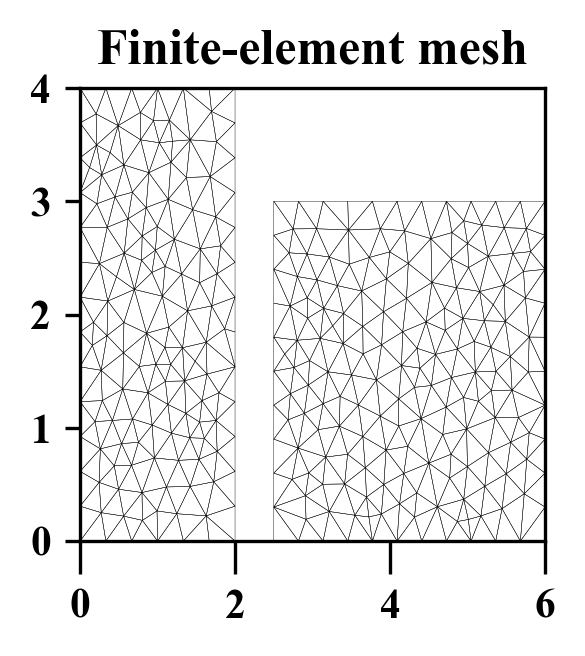

In [35]:
fig = plt.figure(figsize=(2, 2))
ax = fig.add_subplot(111)
mesh2D.add_to_plot(ax, lw=0.1)
plt.title('Finite-element mesh')

In [39]:
mesh2D.describe()

INFO:diva2D:Number of nodes: 325
INFO:diva2D:Number of interfaces: 889
INFO:diva2D:Number of elements: 566
